# **Lab Excercise-09:Restricted Boltzmann Machine (RBM) for Unsupervised Learning**

* Created By : Blessy Louis (2348416)
* Created On : 13.09.2024
* Submitted On: 13.09.2024

## **Import Libraries**


1. **`import pandas as pd`**
   - **Pandas** is a powerful data manipulation and analysis library. It provides data structures like DataFrames and Series, which are essential for handling and analyzing structured data. It also offers various functionalities for data cleaning, transformation, and aggregation.

2. **`from sklearn.model_selection import train_test_split`**
   - **`train_test_split`** is a function from scikit-learn's model_selection module. It splits data arrays into two subsets: one for training the model and one for testing it. This helps in evaluating the performance of machine learning models by training on one part of the data and testing on another.

3. **`from sklearn.preprocessing import MinMaxScaler`**
   - **`MinMaxScaler`** is a feature scaling method from scikit-learn's preprocessing module. It scales features to a given range, typically between 0 and 1. This normalization is essential for many machine learning algorithms, especially those that use distance metrics or are sensitive to the scale of input features.

4. **`from sklearn.neural_network import BernoulliRBM`**
   - **`BernoulliRBM`** (Restricted Boltzmann Machine) is a type of neural network model from scikit-learn's neural_network module. It is used for unsupervised learning and dimensionality reduction. It learns a probabilistic model of the input data and can be used for feature extraction or pre-training other models.

5. **`from sklearn.metrics import mean_squared_error`**
   - **`mean_squared_error`** is a function from scikit-learn's metrics module that calculates the mean squared error (MSE) between predicted and true values. MSE is commonly used to evaluate the performance of regression models and measures the average squared difference between the actual and predicted values.

6. **`import matplotlib.pyplot as plt`**
   - **Matplotlib** is a plotting library used for creating static, animated, and interactive visualizations in Python. The **`pyplot`** module provides a MATLAB-like interface for making plots and charts, such as line plots, histograms, and scatter plots.

7. **`import numpy as np`**
   - **NumPy** is a fundamental library for numerical computing in Python. It provides support for arrays, matrices, and a wide range of mathematical functions to perform operations on these data structures efficiently. NumPy is often used for handling numerical data and performing computations.

8. **`import seaborn as sns`**
   - **Seaborn** is a statistical data visualization library based on Matplotlib. It provides an interface for creating attractive and informative statistical graphics, such as heatmaps, violin plots, and pair plots. Seaborn makes it easy to generate complex visualizations with less code.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
# Reconstruction loss (Mean Squared Error)
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Load Dataset**

### **Data Description**

1. **`age`**
   - **Description**: The age of the individual in years.
   - **Type**: Continuous numerical.
   - **Range/Example Values**: 30-70 years.

2. **`sex`**
   - **Description**: The gender of the individual. Typically, 1 represents male and 0 represents female.
   - **Type**: Categorical binary.
   - **Values**: 0 (Female), 1 (Male).

3. **`cp` (chest pain type)**
   - **Description**: Type of chest pain experienced by the individual. It is often categorized into different types based on symptoms.
   - **Type**: Categorical integer.
   - **Values**:
     - 0: Typical angina
     - 1: Atypical angina
     - 2: Non-anginal pain
     - 3: Asymptomatic

4. **`trestbps` (resting blood pressure)**
   - **Description**: Resting blood pressure (in mm Hg) measured at rest.
   - **Type**: Continuous numerical.
   - **Range/Example Values**: Typically 90-200 mm Hg.

5. **`chol` (serum cholesterol)**
   - **Description**: Serum cholesterol level in mg/dl.
   - **Type**: Continuous numerical.
   - **Range/Example Values**: 100-600 mg/dl.

6. **`fbs` (fasting blood sugar)**
   - **Description**: Fasting blood sugar level greater than 120 mg/dl. 1 indicates greater than 120 mg/dl, and 0 indicates less than 120 mg/dl.
   - **Type**: Categorical binary.
   - **Values**: 0 (Fasting blood sugar < 120 mg/dl), 1 (Fasting blood sugar ≥ 120 mg/dl).

7. **`restecg` (resting electrocardiographic results)**
   - **Description**: Results of the resting electrocardiogram (ECG) test.
   - **Type**: Categorical integer.
   - **Values**:
     - 0: Normal
     - 1: ST-T wave abnormality
     - 2: Left ventricular hypertrophy

8. **`thalach` (maximum heart rate achieved)**
   - **Description**: Maximum heart rate achieved during exercise.
   - **Type**: Continuous numerical.
   - **Range/Example Values**: 60-220 beats per minute.

9. **`exang` (exercise induced angina)**
   - **Description**: Exercise induced angina (chest pain) during exercise. 1 indicates the presence of angina, and 0 indicates absence.
   - **Type**: Categorical binary.
   - **Values**: 0 (No), 1 (Yes).

10. **`oldpeak` (depression induced by exercise)**
    - **Description**: Depression induced by exercise relative to rest, measured in mm. It reflects ST depression induced by exercise relative to rest.
    - **Type**: Continuous numerical.
    - **Range/Example Values**: Typically 0-6 mm.

11. **`slope` (slope of the peak exercise ST segment)**
    - **Description**: Slope of the peak exercise ST segment.
    - **Type**: Categorical integer.
    - **Values**:
      - 0: Upsloping
      - 1: Flat
      - 2: Downsloping

12. **`ca` (number of major vessels colored by fluoroscopy)**
    - **Description**: Number of major vessels (0-3) colored by fluoroscopy.
    - **Type**: Categorical integer.
    - **Values**: 0 to 3.

13. **`thal` (thalassemia)**
    - **Description**: Thalassemia (a blood disorder) test result.
    - **Type**: Categorical integer.
    - **Values**:
      - 1: Normal
      - 2: Fixed defect
      - 3: Reversible defect

14. **`target`**
    - **Description**: Presence or absence of heart disease (target variable).
    - **Type**: Categorical binary.
    - **Values**:
      - 0: No heart disease
      - 1: Heart disease present



In [3]:
# Load the dataset
data = pd.read_csv("/content/heart.csv")
data.head()
data.info()
data.shape
data.describe()
data.columns
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


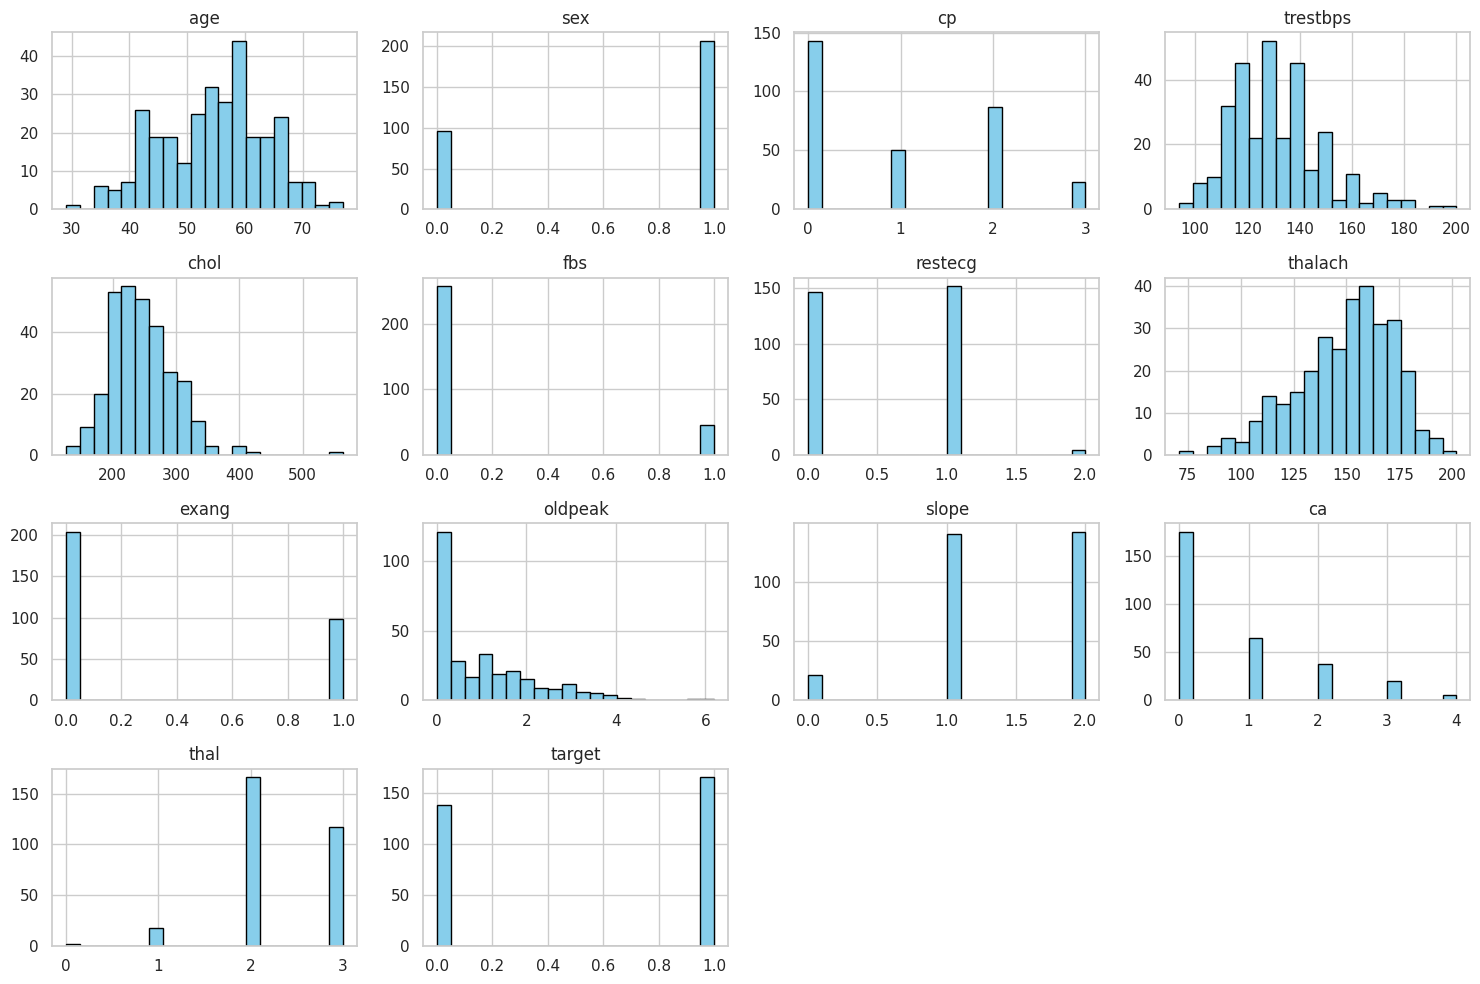

In [5]:
# Set plot style
sns.set(style="whitegrid")

# Plot all columns
data.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

Data preprocessing

In [6]:
# Split into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Normalize continuous columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.neural_network import BernoulliRBM

# Define RBM model
rbm = BernoulliRBM(n_components=10, learning_rate=0.01, n_iter=100, batch_size=10, random_state=42)


In [8]:
# Train the RBM
rbm.fit(X_train)

# Reconstruction on training data
X_train_transformed = rbm.transform(X_train)


In [24]:
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import mean_squared_error

# Assuming X_train is your training dataset

# Initialize and fit the RBM model
rbm = BernoulliRBM(n_components=64, learning_rate=0.0001, n_iter=10, random_state=42)
X_train_transformed = rbm.fit_transform(X_train)

# Manual reconstruction
# Step 1: Compute the hidden layer activations (hidden probabilities)
hidden_probs = rbm.transform(X_train)

# Step 2: Compute the reconstructed visible units (visible probabilities)
# Sigmoid function to map back the hidden layer to visible layer
reconstructed_visible = np.dot(hidden_probs, rbm.components_) + rbm.intercept_visible_
reconstructed_visible = 1 / (1 + np.exp(-reconstructed_visible))  # Apply sigmoid to get probabilities

# Compute reconstruction loss
reconstruction_loss = mean_squared_error(X_train, reconstructed_visible)
print("Reconstruction Loss: ", reconstruction_loss)


Reconstruction Loss:  0.12387292085824735


Epoch 1/50, Training Reconstruction Loss: 0.13495106332521292
Epoch 2/50, Training Reconstruction Loss: 0.1348597538913055
Epoch 3/50, Training Reconstruction Loss: 0.13476311729191284
Epoch 4/50, Training Reconstruction Loss: 0.13467157038088534
Epoch 5/50, Training Reconstruction Loss: 0.13459326189806894
Epoch 6/50, Training Reconstruction Loss: 0.13452440462090437
Epoch 7/50, Training Reconstruction Loss: 0.13445219873877978
Epoch 8/50, Training Reconstruction Loss: 0.13440057229545183
Epoch 9/50, Training Reconstruction Loss: 0.13435174881031428
Epoch 10/50, Training Reconstruction Loss: 0.13429506250830842
Epoch 11/50, Training Reconstruction Loss: 0.1342487127284599
Epoch 12/50, Training Reconstruction Loss: 0.13419761354281723
Epoch 13/50, Training Reconstruction Loss: 0.13415673813418183
Epoch 14/50, Training Reconstruction Loss: 0.13413993359848436
Epoch 15/50, Training Reconstruction Loss: 0.13410706742702116
Epoch 16/50, Training Reconstruction Loss: 0.13409207600581813
Epo

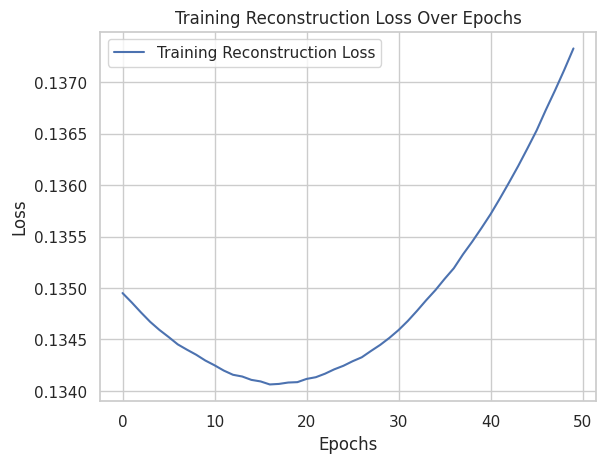

Train Accuracy: 0.5495867768595041
Test Accuracy: 0.5245901639344263


In [28]:
import numpy as np
import pandas as pd
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split into features and target
X = data.drop("target", axis=1)
y = data["target"]

# Normalize continuous columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize the RBM model
rbm = BernoulliRBM(n_components=64, learning_rate=0.001, batch_size=32, n_iter=50, random_state=42)

# List to store training reconstruction loss
training_losses = []

# Manual training loop to track reconstruction loss over epochs
for epoch in range(rbm.n_iter):
    # Perform a partial fit (one epoch at a time)
    rbm.partial_fit(X_train)

    # Compute hidden layer activations
    hidden_probs = rbm.transform(X_train)

    # Reconstruct the visible layer from hidden layer
    reconstructed_visible = np.dot(hidden_probs, rbm.components_) + rbm.intercept_visible_
    reconstructed_visible = 1 / (1 + np.exp(-reconstructed_visible))  # Apply sigmoid to get probabilities

    # Compute reconstruction loss on training data
    training_loss = mean_squared_error(X_train, reconstructed_visible)
    training_losses.append(training_loss)
    print(f"Epoch {epoch + 1}/{rbm.n_iter}, Training Reconstruction Loss: {training_loss}")

# Plot the reconstruction loss over epochs for training data
plt.plot(training_losses, label='Training Reconstruction Loss')
plt.title('Training Reconstruction Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ---------------------------------------------
# TESTING PHASE
# ---------------------------------------------

# Compute hidden layer activations for test set
hidden_probs_test = rbm.transform(X_test)

# Reconstruct the visible layer from hidden layer for test set
reconstructed_visible_test = np.dot(hidden_probs_test, rbm.components_) + rbm.intercept_visible_
reconstructed_visible_test = 1 / (1 + np.exp(-reconstructed_visible_test))  # Apply sigmoid to get probabilities

# Convert reconstructed data to binary predictions
def get_predictions(reconstructed_data):
    return (reconstructed_data > 0.5).astype(int)

# Get binary predictions for training and test data
train_predictions = get_predictions(reconstructed_visible)
test_predictions = get_predictions(reconstructed_visible_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, train_predictions[:, 0])
test_accuracy = accuracy_score(y_test, test_predictions[:, 0])

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


The plot shows the **Training Reconstruction Loss Over Epochs** for what appears to be an unsupervised learning model, potentially an autoencoder, given the focus on reconstruction loss.

1. **Training Reconstruction Loss Curve**:
   - The loss decreases initially, suggesting that the model is learning and improving during the first several epochs (around 20 epochs).
   - After reaching a minimum at around 20 epochs, the loss starts increasing significantly, indicating **overfitting**. This means the model starts memorizing the training data rather than generalizing well to new data.
   - The sharp rise in loss after epoch 20 suggests that continuing the training is causing the model to worsen its performance on the training data itself, which further reinforces the overfitting observation.

2. **Train and Test Accuracy**:
   - **Train Accuracy**: 0.5496 (~54.96%)
   - **Test Accuracy**: 0.5246 (~52.46%)
   - The accuracy on both the training and test sets is relatively close, which is a good sign that the model generalizes to some extent, but the low absolute accuracy indicates the model isn't performing very well on this task.

### Possible Suggestions:
- **Early Stopping**: You might consider using early stopping to halt training around the 20th epoch to prevent overfitting.
- **Model Regularization**: Applying techniques like dropout, weight regularization, or batch normalization may help prevent overfitting.
- **Adjusting the Model Architecture**: You could explore modifying the network's complexity, such as reducing the number of layers or neurons, if the model is too complex for the problem.

Let me know if you need further analysis or if this is part of a larger project where additional insights are needed!